In [228]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import time
import re

In [257]:
def loadDataSet(filename):
    data=[]
    with open(filename,'r') as f:
        txt=f.readlines()
        for item in txt:
            #item.replace('\n','').split('\t')
            #data.append(re.split(r'\s+',item.replace('\n','').strip()))
            data.append(item.replace('\n','').split(','))
    return data

def load1(fileName):
    numFeat = len(open(fileName).readline().split('\t')) - 1
    xArr = []; yArr = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr =[]
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        xArr.append(lineArr)
        yArr.append(float(curLine[-1]))
    return xArr, yArr

#load('housing.data')
#loadDataSet('ex1data1.txt')

In [259]:
np.ones(())

TypeError: 'tuple' object cannot be interpreted as an integer

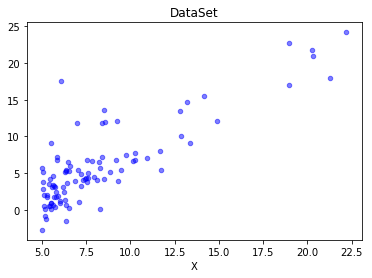

In [263]:
Data=loadDataSet('ex1data1.txt')
DataSet=np.array(Data).astype(float)
row,col=DataSet.shape
DataSet=np.append(np.ones((row,1)),DataSet,axis=1)

def plotDataSet(DataSet):
    row,col=DataSet.shape
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax.scatter(DataSet[:,1],DataSet[:,-1],s=20,c='blue',alpha=.5)
    plt.title('DataSet')
    plt.xlabel('X')
    plt.show()
plotDataSet(DataSet)

In [184]:
def lwlr1(testPoint, xArr, yArr, k = 1.0):
    """
    函数说明:使用局部加权线性回归计算回归系数w
    Parameters:
        testPoint - 测试样本点
        xArr - x数据集
        yArr - y数据集
        k - 高斯核的k,自定义参数
    Returns:
        ws - 回归系数
    Website:http://www.cuijiahua.com/
    Modify:
        2017-11-15
    """
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    m = np.shape(xMat)[0]
    weights = np.mat(np.eye((m)))                                        #创建权重对角矩阵
    for j in range(m):                                                  #遍历数据集计算每个样本的权重
        diffMat = testPoint - xMat[j, :]
        weights[j, j] = np.exp(diffMat * diffMat.T/(-2.0 * k**2))
    xTx = xMat.T * (weights * xMat)                                        
    if np.linalg.det(xTx) == 0.0:
        print("矩阵为奇异矩阵,不能求逆")
        return
    ws = xTx.I * (xMat.T * (weights * yMat))                            #计算回归系数
    return testPoint * ws

def lwlrTest(testArr, xArr, yArr, k=1.0):  
    """
    函数说明:局部加权线性回归测试
    Parameters:
        testArr - 测试数据集
        xArr - x数据集
        yArr - y数据集
        k - 高斯核的k,自定义参数
    Returns:
        ws - 回归系数
    Website:
http://www.cuijiahua.com/
    Modify:
        2017-11-15
    """
    m = np.shape(testArr)[0]                                            #计算测试数据集大小
    yHat = np.zeros(m)    
    for i in range(m):                                                    #对每个样本点进行预测
        yHat[i] = lwlr1(testArr[i],xArr,yArr,k)
    return yHat
row,col=DataSet.shape
xArr=DataSet[:,:col-1]
yArr=DataSet[:,-1]

start = time.time()
#print(lwlrTest(xArr[0:99,:], xArr[0:99,:], yArr[0:99], 0.1))
print(lwlrTest(xArr[100:199,:], xArr[0:99,:], yArr[0:99], 0.1))
end = time.time()
print(end-start)

[   7.6797586     8.54088168   11.60818302    9.4653089    10.7486784
    9.01133495   10.07827028   11.24803291   10.2005939     3.80888833
    6.48750884    9.28728759    4.77263605   11.90082977   11.78085327
    8.81353682   12.02194874    9.53661134   14.76918673    7.30716339
    7.37574709    6.09302207   11.33495456    7.22014561    3.73300219
    5.48044416    7.56878179    5.58669479   10.56642981  185.694
   16.06639358   10.53760126   19.59406897    8.49206092    5.17689339
    9.83748458   18.87796176    5.74534334   10.68544675   10.30899728
    7.54853702    6.60508212   12.12473984    8.41176702    8.21639017
    8.6427194    10.21387014    7.18571033    2.55059494    3.64308604
    9.86770181   14.76192007    9.5294734    11.61300972   20.94459413
   11.56547256   10.82540062    0.99557461    9.83285543   13.4275699
   13.46728567   13.1942776    12.05656009  167.52        -37.39244974
 -202.808       -67.106       -28.21041016   -3.554       -46.51329967
 -182.048    

In [60]:
A = np.array([[1,2],[3,4]])
B = np.array([[3,4],[5,6]])
A[0]-A
A[1]-A
np.eye(5)
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [265]:
def standRegres1(X,Y):
    #最小二乘法
    return np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(Y).reshape(-1,1)

def lwlr(testX,X,Y,K=1.0):
#局部加权线性回归
    testrow,testrowcol=testX.shape#行，列
    row,col=X.shape#行，列
    yhat=np.zeros(row)#用于存高斯核处理得到的预测值
    for i in range(testrow):
        weights=np.eye(row)
        for j in range(row):
            #weights[j,j]=np.exp(np.linalg.norm(testX[i]-X[j])/(-2*K**2))
            diffX=testX[i]-X[j]
            weights[j,j]=np.exp(diffX.dot(diffX.T)/(-2*K**2))
        xTx=X.T.dot(weights).dot(X)    
#         if np.linalg.det(xTx) == 0.0:
#             print("矩阵为奇异矩阵,不能求逆")
#             return
#       ws=np.linalg.inv(xTx).dot(X.T).dot(weights).dot(Y)
        ws=np.linalg.pinv(xTx).dot(X.T).dot(weights).dot(Y)
        yhat[i]=testX[i].dot(ws.T)
    #根据测试输入值输出预测值
    return yhat

def plotDataSet_1(DataSet):
    #最小二乘法求得系数
    theta=standRegres1(DataSet[:,[0,1]],DataSet[:,-1])
    lines_data=DataSet[:,[0,1]].dot(theta)
    #使用局部加权线性回归
    #lines_data=lwlr(DataSet[:,[0,1]],DataSet[:,-1],0.003)
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax.plot(DataSet[:,1],lines_data,c='red')
    ax.scatter(DataSet[:,1],DataSet[:,-1],s=20,c='blue',alpha=.5)
    plt.title('DataSet')
    plt.xlabel('X')
    print(np.corrcoef(lines_data.T,DataSet[:,-1]))
    plt.show()
    
def plotlwlrRegression(DataSet):
    font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)                                #加载数据集
    row,col=DataSet.shape
    xArr=DataSet[:,:col-1]
    yArr=DataSet[:,-1]
    yHat_1 = lwlr(xArr,xArr, yArr, 1.0)                            #根据局部加权线性回归计算yHat
    yHat_2 = lwlr(xArr,xArr, yArr, 0.01)                            #根据局部加权线性回归计算yHat
    yHat_3 = lwlr(xArr,xArr, yArr, 0.003)                            #根据局部加权线性回归计算yHat
    xMat = np.mat(xArr)                                                    #创建xMat矩阵
    yMat = np.mat(yArr)                                                    #创建yMat矩阵
    srtInd = xMat[:, 1].argsort(0)                                        #排序，返回索引值
    xSort = xMat[srtInd][:,0,:]
    fig, axs = plt.subplots(nrows=3, ncols=1,sharex=False, sharey=False, figsize=(10,8))                                        
    axs[0].plot(xSort[:, 1], yHat_1[srtInd], c = 'red')                        #绘制回归曲线
    axs[1].plot(xSort[:, 1], yHat_2[srtInd], c = 'red')                        #绘制回归曲线
    axs[2].plot(xSort[:, 1], yHat_3[srtInd], c = 'red')                        #绘制回归曲线
    axs[0].scatter(xMat[:,1].flatten().A[0], yMat.flatten().A[0], s = 20, c = 'blue', alpha = .5)                #绘制样本点
    axs[1].scatter(xMat[:,1].flatten().A[0], yMat.flatten().A[0], s = 20, c = 'blue', alpha = .5)                #绘制样本点
    axs[2].scatter(xMat[:,1].flatten().A[0], yMat.flatten().A[0], s = 20, c = 'blue', alpha = .5)                #绘制样本点
    #设置标题,x轴label,y轴label
    axs0_title_text = axs[0].set_title(u'局部加权回归曲线,k=1.0',FontProperties=font)
    axs1_title_text = axs[1].set_title(u'局部加权回归曲线,k=0.01',FontProperties=font)
    axs2_title_text = axs[2].set_title(u'局部加权回归曲线,k=0.003',FontProperties=font)
    plt.setp(axs0_title_text, size=8, weight='bold', color='red')  
    plt.setp(axs1_title_text, size=8, weight='bold', color='red')  
    plt.setp(axs2_title_text, size=8, weight='bold', color='red')  
    plt.xlabel('X')
    plt.show()
#计算误差    
def rssError(Y,Yhat):
    return ((Y-Yhat)**2).sum()

# start = time.time()
#print(lwlr(xArr[100:199,:],xArr[0:99,:],yArr[0:99], 0.1))
# end = time.time()
# print(end-start)

#plotlwlrRegression(DataSet[0:99,:])
#print(DataSet[:,-1])
#lwlr(DataSet[:,[0,1]],DataSet[:,-1],0.003)
#plotDataSet_1(DataSet)
print(DataSet,DataSet[:,0],DataSet[:,-1])
theta=standRegres1(DataSet[:,:col],DataSet[:,-1])
# DataSet[:,[0,1]].dot(theta)
# DataSet[:,[0,1]].sort(0)

[[ 1.       6.1101  17.592  ]
 [ 1.       5.5277   9.1302 ]
 [ 1.       8.5186  13.662  ]
 [ 1.       7.0032  11.854  ]
 [ 1.       5.8598   6.8233 ]
 [ 1.       8.3829  11.886  ]
 [ 1.       7.4764   4.3483 ]
 [ 1.       8.5781  12.     ]
 [ 1.       6.4862   6.5987 ]
 [ 1.       5.0546   3.8166 ]
 [ 1.       5.7107   3.2522 ]
 [ 1.      14.164   15.505  ]
 [ 1.       5.734    3.1551 ]
 [ 1.       8.4084   7.2258 ]
 [ 1.       5.6407   0.71618]
 [ 1.       5.3794   3.5129 ]
 [ 1.       6.3654   5.3048 ]
 [ 1.       5.1301   0.56077]
 [ 1.       6.4296   3.6518 ]
 [ 1.       7.0708   5.3893 ]
 [ 1.       6.1891   3.1386 ]
 [ 1.      20.27    21.767  ]
 [ 1.       5.4901   4.263  ]
 [ 1.       6.3261   5.1875 ]
 [ 1.       5.5649   3.0825 ]
 [ 1.      18.945   22.638  ]
 [ 1.      12.828   13.501  ]
 [ 1.      10.957    7.0467 ]
 [ 1.      13.176   14.692  ]
 [ 1.      22.203   24.147  ]
 [ 1.       5.2524  -1.22   ]
 [ 1.       6.5894   5.9966 ]
 [ 1.       9.2482  12.134  ]
 [ 1.     

In [245]:
row,col=DataSet.shape
abX=DataSet[0:99,:col-1]
abY=DataSet[0:99,-1]
yHat01 = lwlr(abX,abX,abY,0.1)
yHat1 = lwlr(abX,abX,abY,1)
yHat10 = lwlr(abX,abX,abY,10)
print('k=0.1时,误差大小为:',rssError(abY[0:99], yHat01.T))
print('k=1  时,误差大小为:',rssError(abY[0:99], yHat1.T))
print('k=10 时,误差大小为:',rssError(abY[0:99], yHat10.T))
print('')
print('训练集与测试集不同:局部加权线性回归,核k的大小是越小越好吗？更换数据集,测试结果如下:')
testabX=DataSet[100:199,:col-1]
testabY=DataSet[100:199,-1]
yHat01 = lwlr(testabX, abX, abY, 0.1)
yHat1 = lwlr(testabX, abX, abY, 1)
yHat10 = lwlr(testabX, abX, abY, 10)

print('k=0.1时,误差大小为:',rssError(testabY, yHat01.T))
print('k=1  时,误差大小为:',rssError(testabY, yHat1.T))
print('k=10 时,误差大小为:',rssError(testabY, yHat10.T))
print('训练集与测试集不同:简单的线性归回与k=1时的局部加权线性回归对比:')
print('k=1时,误差大小为:', rssError(testabY, yHat1.T))
ws = standRegres1(abX, abY)
yHat = testabX.dot(ws)
print('简单的线性回归误差大小:', rssError(testabY, yHat.T))


k=0.1时,误差大小为: 2.817811153449454e-27
k=1  时,误差大小为: 0.020491986557375986
k=10 时,误差大小为: 15.612319082845504

训练集与测试集不同:局部加权线性回归,核k的大小是越小越好吗？更换数据集,测试结果如下:
k=0.1时,误差大小为: 66221.46
k=1  时,误差大小为: nan
k=10 时,误差大小为: 1825551.5816069113
训练集与测试集不同:简单的线性归回与k=1时的局部加权线性回归对比:
k=1时,误差大小为: nan
简单的线性回归误差大小: 4902.55156774779


G:\WorkProgram\anaconda\lib\site-packages\numpy\linalg\linalg.py:1877: RuntimeWarning: overflow encountered in true_divide
  s = divide(1, s, where=large, out=s)
G:\WorkProgram\anaconda\lib\site-packages\numpy\linalg\linalg.py:1880: RuntimeWarning: invalid value encountered in multiply
  res = matmul(transpose(vt), multiply(s[..., newaxis], transpose(u)))


In [217]:
def loadDataSet(fileName):
    """
    函数说明:加载数据
    Parameters:
        fileName - 文件名
    Returns:
        xArr - x数据集
        yArr - y数据集
    Website:
http://www.cuijiahua.com/
    Modify:
        2017-11-19
    """
    numFeat = len(open(fileName).readline().split('\t')) - 1
    xArr = []; yArr = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr =[]
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        xArr.append(lineArr)
        yArr.append(float(curLine[-1]))
    return xArr, yArr

def standRegres(xArr,yArr):
    """
    函数说明:计算回归系数w
    Parameters:
        xArr - x数据集
        yArr - y数据集
    Returns:
        ws - 回归系数
    Website:
http://www.cuijiahua.com/
    Modify:
        2017-11-19
    """
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    xTx = xMat.T * xMat                            #根据文中推导的公示计算回归系数
    if np.linalg.det(xTx) == 0.0:
        print("矩阵为奇异矩阵,不能求逆")
        return
    ws = xTx.I * (xMat.T*yMat)
    return ws
abX, abY = loadDataSet('abalone.txt')
ws = standRegres(abX[0:99], abY[0:99])

yHat = np.mat(abX[100:199]) * ws
print('简单的线性回归误差大小:', rssError(abY[100:199], yHat.T.A))

简单的线性回归误差大小: 518.6363153249081
